In [2]:
# Basic imports
import pandas as pd
import numpy as np
import operator
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
# EDA imports
from wordcloud import WordCloud
import pandas_summary as ps

# Math imports 
import scipy as sp
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from math import sqrt
from statistics import mean 


In [3]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [4]:
# Displaying orginal dataframes' dimensions

print('Anime dataframe dimensions: ', anime.shape)
print('Rating dataframe dimensions: ', rating.shape)

Anime dataframe dimensions:  (12294, 7)
Rating dataframe dimensions:  (7813737, 3)


In [5]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
merged = rating.merge(anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''], how='right')
merged


,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,99.0,32281,5.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,152.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
2,244.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3,271.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
4,278.0,32281,-1.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
...,...,...,...,...,...,...,...,...,...
7814819,39532.0,6133,-1.0,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
7814820,48766.0,6133,-1.0,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
7814821,60365.0,6133,4.0,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
7814822,27364.0,26081,-1.0,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [7]:
merged2 = merged[merged['rating_user'] != -1]
merged2.head()

,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,99.0,32281,5.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,152.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
2,244.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3,271.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5,322.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [8]:
# encoder=LabelEncoder()
# merged2['name']=encoder.fit_transform(merged2['name'])
# merged2['genre']=encoder.fit_transform(merged2['genre'])
# merged2=merged2.drop(columns=['type'],axis=1)
# merged2

In [9]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6338336 entries, 0 to 7814821
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      float64
 1   anime_id     int64  
 2   rating_user  float64
 3   name         object 
 4   genre        object 
 5   type         object 
 6   episodes     object 
 7   rating       float64
 8   members      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 483.6+ MB


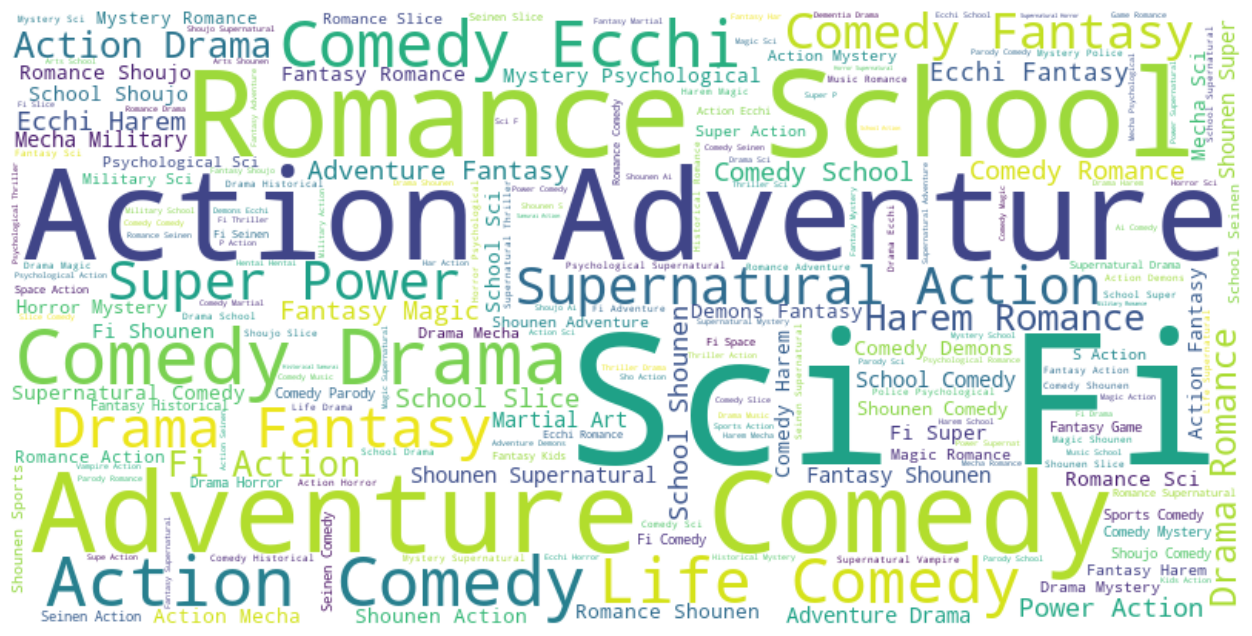

In [10]:
import matplotlib.pyplot as plt
genre_list = merged2['genre'].to_string()

wordcloud = WordCloud(background_color="white",width=800,height=400).generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# Limiting dataframe size to include value counts greater then a min value of anime_id and user_rating, for computing reasons

# Filtering for anime ratings > 50
filter_anime = merged2['anime_id'].value_counts() > 70
filter_anime = filter_anime[filter_anime].index.tolist()

# Filtering for user_ratings > 50
filter_users = merged2['user_id'].value_counts() > 70  
filter_users = filter_users[filter_users].index.tolist()

merged2_new = merged2[(merged2['anime_id'].isin(filter_anime)) & (merged2['user_id'].isin(filter_users))]
print(f'Unfiltered dataframe dimensions: {merged2.shape}')
print(f'New filtered dataframe dimensions: {merged2_new.shape}')

Unfiltered dataframe dimensions: (6338336, 9)
New filtered dataframe dimensions: (5212677, 9)


In [11]:
merged2_new

,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,99.0,32281,5.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,152.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
2,244.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3,271.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5,322.0,32281,10.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
...,...,...,...,...,...,...,...,...,...
7814235,73244.0,1639,5.0,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355
7814240,73328.0,1639,2.0,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355
7814241,73329.0,1639,6.0,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355
7814244,73389.0,1639,7.0,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355


## Pivoting table - creating matrix

In [12]:
piv = merged2_new.pivot_table(index=['user_id'], columns=['name'], values='rating_user')
print(f'Pivoted table dimensions: {piv.shape}')
piv.head()

Pivoted table dimensions: (26371, 4639)


name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transposing/Modifying the Matrix

In [13]:
# Note: As we are subtracting the mean from each rating to standardize
# all users with only one rating or who had rated everything the same will be dropped

# Normalizing the values
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# # Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True)


# Transposing the Matrix
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

print(piv_norm.shape)
piv_norm.head()

(4639, 26288)


user_id,3.0,5.0,7.0,11.0,14.0,17.0,21.0,23.0,27.0,29.0,...,73494.0,73495.0,73499.0,73500.0,73502.0,73503.0,73504.0,73507.0,73510.0,73515.0
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.156535,0.0,0.0,0.0,0.000000,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.237594,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.160976,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.156535,0.0,0.0,0.0,0.000000,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [14]:
# Our data needs to be in a sparse matrix format to be read by the following functions
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)
print(piv_sparse.shape)
piv_sparse

(4639, 26288)


<4639x26288 sparse matrix of type '<class 'numpy.float64'>'
	with 5188218 stored elements in Compressed Sparse Row format>

## Cosine similarity

In [15]:
anime_similarity = cosine_similarity(piv_sparse)

In [16]:
piv_sparse.T.shape

(26288, 4639)

In [17]:
user_similarity = cosine_similarity(piv_sparse.T)

In [18]:
user_similarity 

array([[1.        , 0.06461615, 0.17047619, ..., 0.01765341, 0.06103143,
        0.05476878],
       [0.06461615, 1.        , 0.06718231, ..., 0.05813548, 0.00744523,
        0.04309943],
       [0.17047619, 0.06718231, 1.        , ..., 0.00698529, 0.05715986,
        0.04589163],
       ...,
       [0.01765341, 0.05813548, 0.00698529, ..., 1.        , 0.01406124,
        0.10568117],
       [0.06103143, 0.00744523, 0.05715986, ..., 0.01406124, 1.        ,
        0.00171958],
       [0.05476878, 0.04309943, 0.04589163, ..., 0.10568117, 0.00171958,
        1.        ]])

In [19]:
# Inserting the 2 similarity matrices into separate dataframe objects

# Item to Item cosine similarity 
anime_sim_df = pd.DataFrame(anime_similarity, index = piv_norm.index, columns = piv_norm.index)


In [20]:
# User to User cosine similarity 
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

## Functions for Recommendations

In [21]:
# This function will return the top 10 shows with the highest cosine similarity value

def top_animes(anime_title):
    count = 1
    print(f'Top 10 similar Anime shows compared to {anime_title}:\n')
    for anime in anime_sim_df.sort_values(by = anime_title, ascending = False).index[1:11]: 
        print(f'No. {count}: {anime}')
        count +=1

In [22]:
# This function will return the top 5 users with the highest similarity value 

def top_users(user):
    
    if user not in piv_norm.columns:
        return(f'No data available on user {user}')
    
    print(f'Top 10 similar Users compared to {user}:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print(f'User #{user}, Similarity value: {sim:.2f}')

In [23]:
# This function constructs a list of lists containing the highest rated shows per similar user
# and returns the name of the show along with the frequency it appears in the list
def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return(f'No data available on user {user}')
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]

In [24]:
# This function calculates the weighted average of similar users
# to determine a potential rating for an input user and show

def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [25]:
top_animes('Boku no Pico')

Top 10 similar Anime shows compared to Boku no Pico:



No. 1: Pico to Chico
No. 2: Pico x CoCo x Chico
No. 3: Shounen Maid Kuuro-kun: Tenshi no Uta
No. 4: Pico: My Little Summer Story
No. 5: Enzai
No. 6: Boku no Sexual Harassment
No. 7: Keiraku no Houteishiki Level-C
No. 8: Okane ga Nai
No. 9: Papa to Kiss in the Dark
No. 10: Sensitive Pornograph


In [26]:
top_users(322)

Top 10 similar Users compared to 322:

User #13936.0, Similarity value: 0.25
User #39420.0, Similarity value: 0.24
User #43217.0, Similarity value: 0.23
User #41070.0, Similarity value: 0.22
User #20009.0, Similarity value: 0.22
User #12313.0, Similarity value: 0.21
User #33463.0, Similarity value: 0.21
User #62489.0, Similarity value: 0.21
User #62285.0, Similarity value: 0.20
User #46792.0, Similarity value: 0.20


In [27]:
similar_user_recs(322)

[('Death Note', 6),
 ('Code Geass: Hangyaku no Lelouch R2', 6),
 ('Steins;Gate', 6),
 ('Shigatsu wa Kimi no Uso', 5),
 ('Clannad: After Story', 4)]

In [28]:
predicted_rating('Nana', 322)

8.651691689412399